# Ejercicio 1

En el circuito de la figura, la llave $S$ ha permanecido en la posición $1$ durante mucho tiempo. En el instante $t = 0$, la llave $S$ conmuta a la posición $2$. Calcular y graficar las corrientes $i_1$ e $i_2$ en función del tiempo.

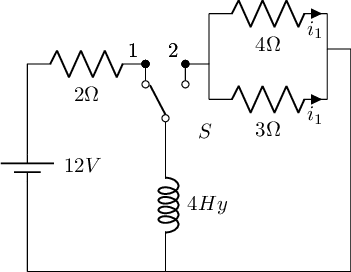

In [2]:
#
import lcapy as ly

c1=ly.Circuit()
c1.add("""
BAT _1 _0; down=1.6, kind=cell1,  l={$12V$}
R1 _1 1 ; right, l={$2\Omega$}
SW _3 1 2 spdt; up, l={$S$}
L _3 _0b ; down, l={$4Hy$}
W1 _0b _0; left
W2  2 _2b; right=0.2
W3 _2b _2bup; up=0.3
W4 _2b _2bdown; down=0.3
R2 _2bup _4bup; right, l={$4\Omega$}, i={$i_1$}
R3 _2bdown _4bdown; right, l={$3\Omega$}, i={$i_1$}
W5 _4bup _4b; down=0.3
W6 _4bdown _4b; up=0.3
W7 _4b _4c; right=0.2
W8=  _4d _4c; up=1.884
W9= _4d _0b;left
""")

c1.draw()

Cuando el enunciado dice que "la llave $S$ ha permanecido en la posición $1$ durante mucho tiempo" indica que esta parte del circuito está en régimen permanente, lo que implica que el inductor puede interpretarse como un cortocircuito para la fuente de corriente continua. Por lo tanto la corriente en este circuito es   $I_0=\frac{12V}{2\Omega}=6A$.

Para $t=0$; cuando el interruptor cambia de la posición $1$ a la $2$; la inductancia tiene una carga inicial $I_0=6A$

El circuito para $t	> 0$ es el siguiente:

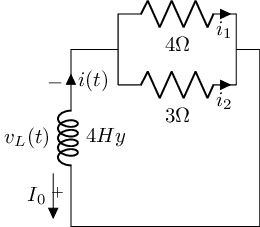

In [1]:
#
import lcapy as ly

c2=ly.Circuit()
c2.add("""

L  _0b _3 4; up=1.5, l={$4Hy$}, f<^={$I_0$}, i={$i(t)$}, v={$v_L(t)$}
W2  _3 _2b; right=0.4
W3 _2b _2bup; up=0.3
W4 _2b _2bdown; down=0.3
R2 _2bup _4bup; right, l={$4\Omega$}, i={$i_1$}
R3 _2bdown _4bdown; right, l={$3\Omega$}, i={$i_2$}
W5 _4bup _4b; down=0.3
W6 _4bdown _4b; up=0.3
W7 _4b _4c; right=0.2
W8= _4c _4d; down=1.5
W9= _4d _0b;left
""")

c2.draw()

Ahora podemos plantear la ley de las tensiones de kirchhoff $v_L(t)+v_{R_{eq}}(t)=0$

y reemplazando por las relaciones Volt-Ampere correspondientes:

$\begin{equation}L \frac{di(t)}{dt}+ i(t)R=0\end{equation}$

Esto es una ecuación diferencial ordinaria de primer orden. La respuesta a estas ecuación diferencial tienen la forma: 

$i(t)=Ae^{Dt}+B$ $(1)$
 

Aplicando el método del operador diferencial $D$ planteamos $(L . D .i+ Ri)  = 0$ por lo que $D=-\frac{R}{L}$ 

Se define a $\tau=\frac{L}{R}$ como la constante de tiempo del circuito y es una medida de la duración de la respuesta transitoria

Para encontrar las constantes A y B se debe analizar el circuito en $t=0$ y $t=\infty$.

__Evaluación del circuito para $t=0$__

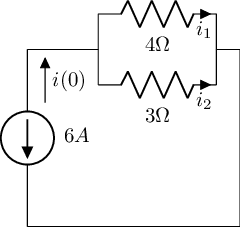

In [2]:
#
import lcapy as ly

c3=ly.Circuit()
c3.add("""

I  _0b _3 4; up=1.5, l={$6A$}, f<^={$i(0)$}
W2  _3 _2b; right=0.6
W3 _2b _2bup; up=0.3
W4 _2b _2bdown; down=0.3
R2 _2bup _4bup; right, l={$4\Omega$}, i={$i_1$}
R3 _2bdown _4bdown; right, l={$3\Omega$}, i={$i_2$}
W5 _4bup _4b; down=0.3
W6 _4bdown _4b; up=0.3
W7 _4b _4c; right=0.2
W8= _4c _4d; down=1.5
W9= _4d _0b;left
""")

c3.draw()

Inspeccionando el circuito obtenemos:

$i(0)=-6A$

Analizando la ecuación $(1)$ para $t=0$:

$A+B=-6A$

__Evaluación del circuito para $t=\infty$__

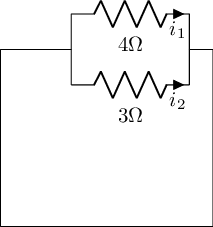

In [3]:
#
import lcapy as ly

c3=ly.Circuit()
c3.add("""

W101  _0b _3 ; up=1.5
W2  _3 _2b; right=0.6
W3 _2b _2bup; up=0.3
W4 _2b _2bdown; down=0.3
R2 _2bup _4bup; right, l={$4\Omega$}, i={$i_1$}
R3 _2bdown _4bdown; right, l={$3\Omega$}, i={$i_2$}
W5 _4bup _4b; down=0.3
W6 _4bdown _4b; up=0.3
W7 _4b _4c; right=0.2
W8= _4c _4d; down=1.5
W9= _4d _0b;left
""")

c3.draw()

Inspeccionando el circuito obtenemos:

$i(\infty)=0$

Analizando la ecuación $(1)$ obtenemos:

$i(\infty)=B$

Por lo que podemos deducir que en este caso:

$B=0$

$A=-6A$

La solución por lo tanto será:
$i(t)=-6e^{-0.428t}$

Ahora podremos calcular $i_1(t)$ e $i_2(t)$ aplicando la regla del divisor de corrientes. 